## Self coding/implementation of a 3 layer neural network 
The original version is at backup (10)


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(t):return 1/(1+np.exp(-t))


### Try a simple classification to verify it's correct

<font color="red">I am so happy this code implementation worked as I expected even without any debugging.\
    WOW!
</font>


[[0.62388886 1.        ]
 [0.50982537 1.        ]
 [0.42492914 1.        ]
 ...
 [0.95808483 0.        ]
 [0.77631614 0.        ]
 [0.80977539 0.        ]]
Calculated weights)
c: [-1.66667488]
V: [[-11.4768248   -1.90073219  -2.62758535 -14.32240354  -1.76334182
   -2.03747588  -2.15436944  26.03811556  -2.51470386  -9.71883396]]
b: [ -8.63990701   0.99506401  -1.39478065 -10.36290417   1.24209982
   1.28191801   1.14800746  -6.2781989    0.63554478  -7.53673524]
W: [[11.09685864]
 [ 0.52673681]
 [ 1.28720264]
 [13.46247046]
 [ 0.19964462]
 [ 0.40057925]
 [ 0.38019118]
 [23.0144915 ]
 [ 0.4075543 ]
 [ 9.56060018]]
Final cost is: 0.0003475845027577602


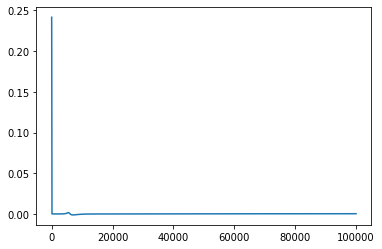

In [3]:
#define the node counts
N = 1 #number of input elements
H = 10 #number of hidden elements
M = 1 #number of output elements

#data-set stuff
# m = 1000 #number of examples
# x_train = np.random.rand(m,N)
# y_train = (x_train>0.5).astype(np.int16)

m = 1000

pos_x = 0.25 + 0.5 * np.random.rand(m//2,1)
neg_x1 = 0 + 0.25 * np.random.rand(m//4,1)
neg_x2 = 0.75 + 0.25 * np.random.rand(m//4,1)
neg_x = np.concatenate((neg_x1,neg_x2))

x_train = np.concatenate((pos_x,neg_x))
y_train = np.logical_and(x_train>0.25,x_train<0.75).astype(np.int16)



x_y = np.hstack((x_train.reshape(-1,1),y_train.reshape(-1,1)))
print(x_y)






#our convension of x,y is different
x = x_train.T
y = y_train.T



#initialize the parameters as arrays with proper dimensions
W = np.random.rand(H,N)
b = np.random.rand(H)
V = np.random.rand(M,H)
c = np.random.rand(M)

cost_history = []

n_iters = 100_000
for _ in range(n_iters):
    
    #forward pass calculations
    h = sigmoid(W @ x + b.reshape(-1,1))
    y_hat = sigmoid(V @ (h) + c.reshape(-1,1))
    
    #y_hat_alpha - y_alpha
    diff = y_hat - y
    dSigmoidFactor_y_hat = y_hat * (1 - y_hat)
    
    intermediate_0 = diff * dSigmoidFactor_y_hat
    
    #fine tune c
    dE_dcALLAlpha = np.sum(intermediate_0, axis = 1)/m #dim = (M,)
    ##completely found :E_dcALLAlpha
    
    
    dE_dVALLAlphaALLBeta = np.zeros((M,H))
    for beta in range(H):
        dE_dVALLAlphaThisBeta = np.sum(intermediate_0 * h[beta,:], axis=1) /m
        dE_dVALLAlphaALLBeta[:,beta] = dE_dVALLAlphaThisBeta
    ##completely found :dE_dVALLAlphaALLBeta
    
    
    dE_dbALLAlpha = np.zeros(H)
    dE_dWALLAlpha_ALLBeta = np.zeros((H,N))
    
    for alpha in range(H):
        
        dSigmoidFactor_h_alpha = h[alpha,:] #temp
        dSigmoidFactor_h_alpha *= 1- dSigmoidFactor_h_alpha #done
        
        intermediate_1 = intermediate_0 * V[:,alpha].reshape(-1,1) * dSigmoidFactor_h_alpha
        dE_dbThisAlpha= np.sum(intermediate_1)/m
        dE_dbALLAlpha[alpha] = dE_dbThisAlpha
        
        for beta in range(N):
            dE_dWThisAlphaThisBeta= np.sum(intermediate_1 * x[beta,:])/m
            dE_dWALLAlpha_ALLBeta[alpha,beta] = dE_dWThisAlphaThisBeta
    ##completely found :dE_dbALLAlpha
    ##completely found :dE_dWALLAlpha_ALLBeta
    
    
    #All derivatives are now found
    
    #calc the cost now
    cost = np.sum(y_hat - y)/(2*m)
    cost_history.append(cost)
    
    ## Update parameters :: Gradient decesnt
    lr = 1
    
    c -= lr * dE_dcALLAlpha
    V -= lr * dE_dVALLAlphaALLBeta
    b -= lr * dE_dbALLAlpha
    W -= lr * dE_dWALLAlpha_ALLBeta

        

        
print("Calculated weights)")
print("c:",c)
print("V:",V)
print("b:",b)
print("W:",W)
plt.plot(cost_history)
print("Final cost is:",cost_history[-1])


In [4]:
def predict(x_test):
    x = x_test.T
    h = sigmoid(W @ x + b.reshape(-1,1))
    y_hat = sigmoid(V @ (h) + c.reshape(-1,1))
    y_predicted = y_hat.T>0.5
    return y_predicted,x,h,y_hat


In [5]:
#calc accuracy
y_pred = predict(x_train)[0]
accuracy = np.sum(y_pred == y_train)/np.prod(y_pred.shape)
print("Accuracy:", accuracy)

Accuracy: 0.997


In [6]:
xx = np.array([i/100 for i in range(0,100,3)]).reshape(-1,1)
yy = predict(xx)

visualizer = np.concatenate((xx,yy[0]),axis=1)
print(visualizer)

[[0.   0.  ]
 [0.03 0.  ]
 [0.06 0.  ]
 [0.09 0.  ]
 [0.12 0.  ]
 [0.15 0.  ]
 [0.18 0.  ]
 [0.21 0.  ]
 [0.24 0.  ]
 [0.27 1.  ]
 [0.3  1.  ]
 [0.33 1.  ]
 [0.36 1.  ]
 [0.39 1.  ]
 [0.42 1.  ]
 [0.45 1.  ]
 [0.48 1.  ]
 [0.51 1.  ]
 [0.54 1.  ]
 [0.57 1.  ]
 [0.6  1.  ]
 [0.63 1.  ]
 [0.66 1.  ]
 [0.69 1.  ]
 [0.72 1.  ]
 [0.75 1.  ]
 [0.78 0.  ]
 [0.81 0.  ]
 [0.84 0.  ]
 [0.87 0.  ]
 [0.9  0.  ]
 [0.93 0.  ]
 [0.96 0.  ]
 [0.99 0.  ]]


In [7]:
yy[1].T

array([[0.  ],
       [0.03],
       [0.06],
       [0.09],
       [0.12],
       [0.15],
       [0.18],
       [0.21],
       [0.24],
       [0.27],
       [0.3 ],
       [0.33],
       [0.36],
       [0.39],
       [0.42],
       [0.45],
       [0.48],
       [0.51],
       [0.54],
       [0.57],
       [0.6 ],
       [0.63],
       [0.66],
       [0.69],
       [0.72],
       [0.75],
       [0.78],
       [0.81],
       [0.84],
       [0.87],
       [0.9 ],
       [0.93],
       [0.96],
       [0.99]])

In [8]:
yy[0]


array([[False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False],
       [False]])

In [9]:
yy[2].T

array([[1.76872063e-04, 7.30086997e-01, 1.98645651e-01, 3.15816041e-05,
        7.75929307e-01, 7.82776088e-01, 7.59146783e-01, 1.87326212e-03,
        6.53745659e-01, 5.32851263e-04],
       [2.46722089e-04, 7.33189614e-01, 2.04864368e-01, 4.72963536e-05,
        7.76968910e-01, 7.84812550e-01, 7.61226073e-01, 3.72942746e-03,
        6.56508079e-01, 7.09729098e-04],
       [3.44147678e-04, 7.36269450e-01, 2.11226450e-01, 7.08300807e-05,
        7.78005070e-01, 7.86835120e-01, 7.63293010e-01, 7.41116101e-03,
        6.59259948e-01, 9.45265291e-04],
       [4.80026201e-04, 7.39326375e-01, 2.17732006e-01, 1.06072481e-04,
        7.79037786e-01, 7.88843794e-01, 7.65347569e-01, 1.46740096e-02,
        6.62001120e-01, 1.25886988e-03],
       [6.69517194e-04, 7.42360265e-01, 2.24380929e-01, 1.58847398e-04,
        7.80067055e-01, 7.90838571e-01, 7.67389730e-01, 2.88475072e-02,
        6.64731455e-01, 1.67634246e-03],
       [9.33740134e-04, 7.45371006e-01, 2.31172890e-01, 2.37873508e-04,
   